In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
img_width = 256
img_height = 256
img_channels = 3

# Custom for a specific Problem

## Importing the Libraries

In [4]:
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

## Setting the path

In [5]:
train_path = "D:\\Data sets\\DRIVE\\training"
test_path = "D:\\Data sets\\DRIVE\\test"

In [6]:


train_path = "D:\\Data sets\\DRIVE\\training"
train_ids = next(os.walk(train_path + "\\images"))[2]
gt_ids = next(os.walk(train_path + "\\1st_manual"))[2]

test_ids = next(os.walk(test_path + "\images"))[2]

In [7]:
train_ids[:5], gt_ids[:5], test_ids[:5] 

(['21_training.tif',
  '22_training.tif',
  '23_training.tif',
  '24_training.tif',
  '25_training.tif'],
 ['21_manual1.gif',
  '22_manual1.gif',
  '23_manual1.gif',
  '24_manual1.gif',
  '25_manual1.gif'],
 ['01_test.tif', '02_test.tif', '03_test.tif', '04_test.tif', '05_test.tif'])

## Setting the train and test 

In [8]:
X_train = np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), img_height, img_width), dtype=np.uint8)

In [9]:
import gif2numpy
import cv2

In [10]:
def gtImageDis(gt_path):
    frames, exts, image_specs = gif2numpy.convert(gt_path)
    frames = np.array(frames)
    labeled_img = frames.reshape(584, 565,3)
    labeled_img_dis = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    return labeled_img_dis

In [11]:
print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = train_path +"\\images\\" +id_
    img = imread(path,plugin="pil")[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    
    X_train[n] = img  #Fill empty X_train with values from img
            
    gt_path = train_path+ "\\1st_manual\\" + gt_ids[n]
    gt_img = gtImageDis(gt_path)
    
    gt_img = resize(gt_img, (img_height, img_width), mode='constant', preserve_range=True)
    Y_train[n] = gt_img
    
print("Done")

  0%|          | 0/20 [00:00<?, ?it/s]

Resizing training images and masks


100%|██████████| 20/20 [00:06<00:00,  3.12it/s]

Done


In [12]:
import numpy as np
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 1075584,
 1: 6751,
 2: 4971,
 3: 4206,
 4: 3641,
 5: 2934,
 6: 2562,
 7: 2435,
 8: 2017,
 9: 1822,
 10: 1833,
 11: 1654,
 12: 1832,
 13: 1758,
 14: 1777,
 15: 1477,
 16: 1589,
 17: 1580,
 18: 1422,
 19: 1382,
 20: 1499,
 21: 1320,
 22: 1401,
 23: 1441,
 24: 1318,
 25: 1428,
 26: 1379,
 27: 1212,
 28: 1317,
 29: 1398,
 30: 1099,
 31: 1329,
 32: 1227,
 33: 1083,
 34: 1221,
 35: 1223,
 36: 1304,
 37: 971,
 38: 1163,
 39: 1221,
 40: 971,
 41: 1070,
 42: 1139,
 43: 794,
 44: 909,
 45: 875,
 46: 741,
 47: 926,
 48: 677,
 49: 774,
 50: 875,
 51: 730,
 52: 612,
 53: 619,
 54: 761,
 55: 859,
 56: 611,
 57: 580,
 58: 664,
 59: 617,
 60: 693,
 61: 629,
 62: 616,
 63: 565,
 64: 575,
 65: 751,
 66: 508,
 67: 499,
 68: 609,
 69: 570,
 70: 697,
 71: 475,
 72: 533,
 73: 541,
 74: 521,
 75: 635,
 76: 549,
 77: 513,
 78: 510,
 79: 628,
 80: 606,
 81: 538,
 82: 574,
 83: 521,
 84: 546,
 85: 581,
 86: 491,
 87: 542,
 88: 529,
 89: 642,
 90: 531,
 91: 505,
 92: 498,
 93: 572,
 94: 720,
 95: 519,
 96: 5

In [13]:
X_test = np.zeros((len(test_ids), img_height, img_width, img_channels), dtype=np.uint8)
sizes_test = []

In [14]:
# test images
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = test_path +"\\images\\" +id_
    img = imread(path,plugin="pil")[:,:,:img_channels]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)

    X_test[n] = img

print('Done!')

 15%|█▌        | 3/20 [00:00<00:00, 29.41it/s]

Resizing test images


100%|██████████| 20/20 [00:00<00:00, 29.47it/s]

Done!


## Preview of the Work Done Till Now

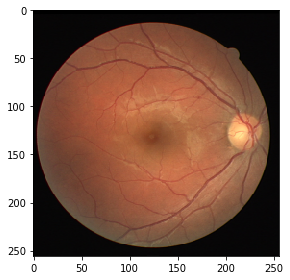

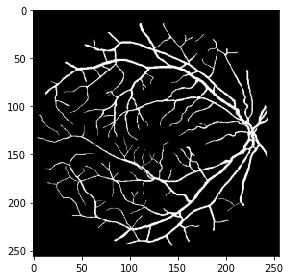

In [15]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

# The Model

In [31]:
norm_inputs = tf.keras.layers.Input((img_height, img_width,img_channels))
inputs = tf.keras.layers.Lambda(lambda x: x/255)(norm_inputs)

In [32]:
inputs

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'lambda_2')>

## Contraction Path

In [33]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c1)
p1 = tf.keras.layers.MaxPool2D((2,2))(c1)

In [34]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c2)
p2 = tf.keras.layers.MaxPool2D((2,2))(c2)

In [35]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c3)
p3 = tf.keras.layers.MaxPool2D((2,2))(c3)

In [36]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p3)
c4 = tf.keras.layers.Dropout(0.1)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c4)
p4 = tf.keras.layers.MaxPool2D((2,2))(c4)

In [37]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(p4)
c5 = tf.keras.layers.Dropout(0.1)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding = 'same' )(c5)
p5 = tf.keras.layers.MaxPool2D((2,2))(c5)

## Expansive Path

In [38]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [39]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [40]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [41]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [42]:
outputs = tf.keras.layers.Conv2D(256, (1, 1), activation='softmax')(c9)

In [43]:
model = tf.keras.Model(inputs=[norm_inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 256, 256, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 256, 256, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

## Model Check Point

In [44]:
checkpointer = tf.keras.callbacks.ModelCheckpoint("u_net_model.h5", verbose=1, save_best_only=True)

In [45]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    #tf.keras.callbacks.TensorBoard(log_dir = 'logs')
]

In [46]:
es = tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
tboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

# Results

In [47]:
results = model.fit(X_train, Y_train, validation_split=0.2, batch_size=4, epochs=25, callbacks=callbacks)

Epoch 1/25


ValueError: in user code:

    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    D:\ana\envs\tensor\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (4, 256, 256) and (4, 256, 256, 256) are incompatible


In [41]:
#idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.99).astype(np.uint8)
preds_val_t = (preds_val > 0.99).astype(np.uint8)
preds_test_t = (preds_test > 0.99).astype(np.uint8)

1/1 [==============================] - 3s 3s/step


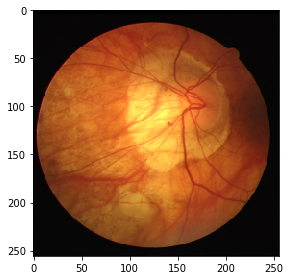

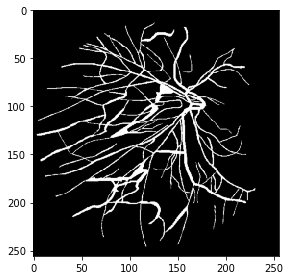

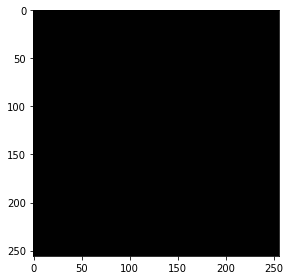

In [42]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(Y_train[ix])
plt.show()
imshow(np.squeeze(preds_train_t[ix]), cmap = "gray")
plt.show()

## Sanity check on some random validation samples

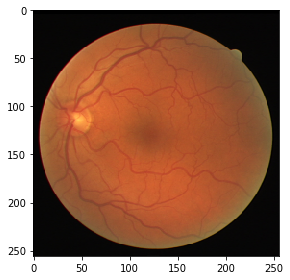

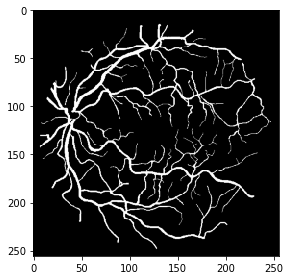

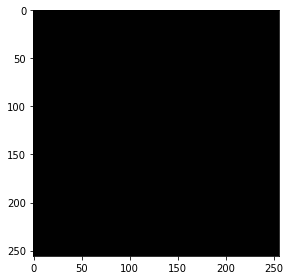

In [43]:
ix = random.randint(0, len(preds_val_t)-1)
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]), cmap="gray")
plt.show()


## Sanity check on some random validation samples

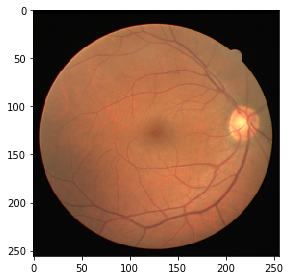

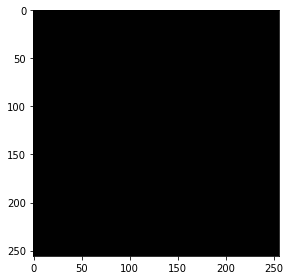

In [44]:
ix = random.randint(0, len(preds_test_t) - 1)
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(preds_test_t[ix]), cmap="gray")
plt.show()